In [1]:
%run ./../data/load-tokenized-dataset.ipynb
%run ./../doc2vec/_load-d2v-model.ipynb
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.sparse import csr_matrix
from sklearn.metrics import log_loss as loss_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
INFER = False
NORMED = False

RANDOM_SEED = 0

In [4]:
corpus, labels = df[[proc_doc_col, label_col]].T.values
X = d2v_model.dv.vectors if not INFER else [d2v_model.infer_vector(doc) for doc in tqdm(corpus, disable=SILENT)]
y = labels.astype(int)

if NORMED:
    X = normalize(X, norm='l2', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=RANDOM_SEED)

In [5]:
model = LogisticRegression(n_jobs=-1)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
loss, score = loss_score(y_test, y_preds), accuracy_score(y_test, y_preds)
loss, score

(4.390616655456708, 0.87288)

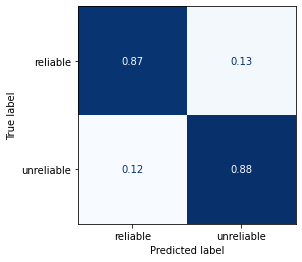

In [6]:
ConfusionMatrixDisplay.from_predictions(y_preds, y_test, normalize='true', colorbar=False,
                                        cmap=plt.cm.Blues, display_labels=("reliable", "unreliable"))